<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/technical%20indicators/technical_indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
#!pip install pandas-ta==0.2.45b

     |████████████████████████████████| 6.4 MB 6.0 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
#import pandas_ta as ta
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


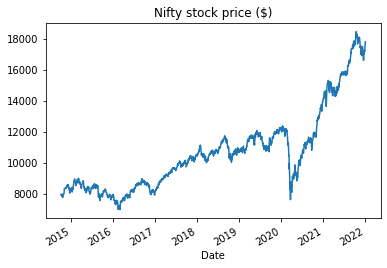

In [3]:
nifty_df = yf.download('^nsei',start='2014-10-01') # 2018
nifty_df['Adj Close'].plot(title='Nifty stock price ($)');

In [4]:
rapida = 26
lenta = 52
stdv = 1.2
nifty_df['fast'] =nifty_df['Adj Close'].rolling(window=rapida).mean() 
nifty_df['slow'] =nifty_df['Adj Close'].rolling(window=lenta).mean()
nifty_df['bband']= nifty_df['fast']-nifty_df['slow']
nifty_df['avg'] = nifty_df['bband'].rolling(window=9).mean()
nifty_df['Sdev'] = nifty_df['bband'].rolling(window=9).std()
nifty_df['Upper Band'] = nifty_df['avg'] + (nifty_df['Sdev'] *stdv)
nifty_df['Lower Band'] = nifty_df['avg'] - (nifty_df['Sdev'] *stdv)


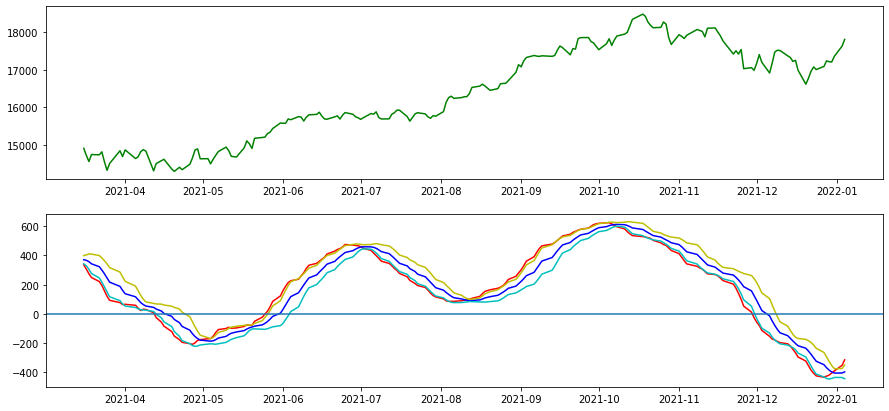

In [5]:
fig, ax = plt.subplots(2,1,figsize=(15,7))
ax[0].plot(nifty_df[['Adj Close']][-200:],color='g')
#plt.plot(df_new['Adj Close'].values - mean, 'red', lw=1.5)
ax[1].plot(nifty_df[['bband']][-200:],color='r')
ax[1].plot(nifty_df[['avg',]][-200:],color='b')
ax[1].plot(nifty_df[['Upper Band',]][-200:],color='y')
ax[1].plot(nifty_df[['Lower Band']][-200:],color='c')
ax[1].axhline(y=0)
plt.show()

In [6]:
nifty_df['Close'][-1]

17805.25